In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import seaborn as sns
import squarify as squarify

In [122]:
rfm = pd.read_csv('RFM RAW JAN TO JUNE.csv')

In [123]:
rfm

,customer_id,order_date,revenue
0,a68135,1/3/21,27720
1,a205746,2/10/21,37440
2,a80002,1/13/21,13500
3,a169942,3/5/21,15000
4,a148943,2/8/21,11500
...,...,...,...
375055,a154762,5/1/21,0
375056,a154762,5/1/21,0
375057,a48384,6/7/21,0
375058,a4682,6/23/21,0


In [124]:
rfm['Date'] = pd.to_datetime(rfm['order_date'])     #convert Date to datetime format

<AxesSubplot: ylabel='Frequency'>

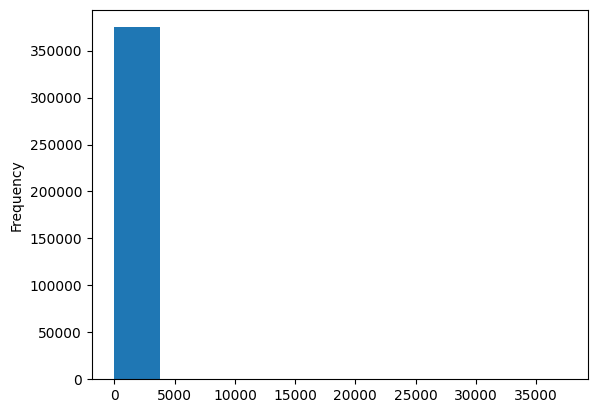

In [125]:
rfm['revenue'].plot(kind = 'hist')

In [126]:
rfm_r=rfm

In [127]:
data = rfm_r.sort_values('revenue', ascending = False)
data

,customer_id,order_date,revenue,Date
1,a205746,2/10/21,37440,2021-02-10
0,a68135,1/3/21,27720,2021-01-03
11,a202053,2/13/21,19200,2021-02-13
12,a96093,1/7/21,19168,2021-01-07
7,a84704,3/23/21,18720,2021-03-23
...,...,...,...,...
170545,a76284,1/18/21,0,2021-01-18
170445,a61007,1/28/21,0,2021-01-28
170446,a84431,1/23/21,0,2021-01-23
170447,a213444,1/23/21,0,2021-01-23


In [128]:
type(data)

pandas.core.frame.DataFrame

In [129]:
data.dtypes

customer_id            object
order_date             object
revenue                 int64
Date           datetime64[ns]
dtype: object

In [130]:
data['Date'].max()

Timestamp('2021-06-24 00:00:00')

In [131]:
# Create a snapshot date

snapshot_date = data['Date'].max() + timedelta (days = 1)
snapshot_date

Timestamp('2021-06-25 00:00:00')

In [132]:
# Group data by userID

data_process = data.groupby(['customer_id']).agg({
    'Date' : lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'revenue' : 'sum'
})
data_process.sort_values('revenue', ascending = False)

,Date,customer_id,revenue
customer_id,,,
a192765,40,55,159852
a20260,36,85,111570
a207678,72,62,107388
a116953,70,31,70408
a168448,34,52,66463
...,...,...,...
a59525,98,1,100
a172470,99,1,100
a188295,98,1,100


In [133]:
# Rename the columns

data_process.rename(columns = {
    'customer_id':'CustomerID',
    'Date':'Recency',
    'Transactions':'Frequency',
    'revenue':'Monetary_Value'
}, inplace = True)
data_process.sort_values('Monetary_Value', ascending = False)

,Recency,CustomerID,Monetary_Value
customer_id,,,
a192765,40,55,159852
a20260,36,85,111570
a207678,72,62,107388
a116953,70,31,70408
a168448,34,52,66463
...,...,...,...
a59525,98,1,100
a172470,99,1,100
a188295,98,1,100


In [134]:
# Rename the columns

data_process.rename(columns = {
    'customer_id':'CustomerID',
    'Date':'Recency',
    'CustomerID':'Frequency',
    'revenue':'Monetary_Value'
}, inplace = True)
data_process.sort_values('Monetary_Value', ascending = False)

,Recency,Frequency,Monetary_Value
customer_id,,,
a192765,40,55,159852
a20260,36,85,111570
a207678,72,62,107388
a116953,70,31,70408
a168448,34,52,66463
...,...,...,...
a59525,98,1,100
a172470,99,1,100
a188295,98,1,100


/var/folders/dz/qxrbd86x2_n6wxkg24r914780000gn/T/ipykernel_67270/4294926671.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3,1,1); sns.distplot(data_process['Recency'])
/var/folders/dz/qxrbd86x2_n6wxkg24r914780000gn/T/ipykernel_67270/4294926671.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subp

<AxesSubplot: xlabel='Monetary_Value', ylabel='Density'>

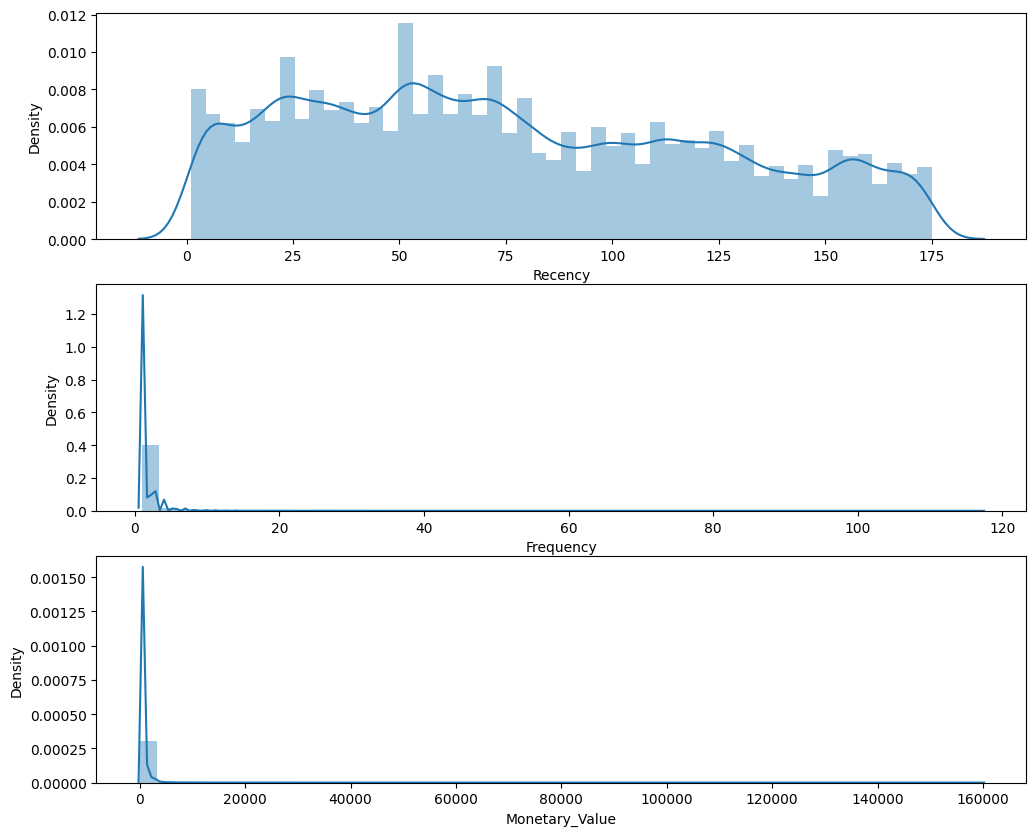

In [135]:
# Plotting RFM distributions

plt.figure(figsize=(12,10))

# Plotting R

plt.subplot(3,1,1); sns.distplot(data_process['Recency'])
plt.subplot(3,1,2); sns.distplot(data_process['Frequency'])
plt.subplot(3,1,3); sns.distplot(data_process['Monetary_Value'])

In [136]:
r_groups = pd.qcut(data_process['Recency'],q = 5, labels = [5,4,3,2,1])

In [137]:
f_groups = pd.qcut(data_process['Frequency'],q = [0,.9,.99,.999,.9999,1], labels = [1,2,3,4,5])

In [138]:
m_groups = pd.qcut(data_process['Monetary_Value'], q = 5, labels = [1,2,3,4,5])

In [139]:
# TO SEE HOW QUANTILE VALUES ARE
quantiles = data_process[['Recency','Frequency','Monetary_Value']].quantile([0,.3,.6,.9,.95,.96,.97,.98,.99,1]).to_dict
quantiles

<bound method DataFrame.to_dict of       Recency  Frequency  Monetary_Value
0.00      1.0        1.0          100.00
0.30     44.0        1.0          499.00
0.60     85.0        1.0          625.00
0.90    149.0        3.0         1400.80
0.95    161.0        4.0         2103.00
0.96    164.0        5.0         2396.00
0.97    167.0        5.0         2800.00
0.98    170.0        7.0         3267.00
0.99    172.0        9.0         4638.92
1.00    175.0      117.0       159852.00>

In [140]:
# Create new columns for R and F
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_process

,Recency,Frequency,Monetary_Value,R,F,M
customer_id,,,,,,
a1,135,2,534,1,1,3
a10,97,1,380,2,1,1
a100,23,1,585,5,1,3
a1000,32,3,2025,4,1,5
a10000,55,1,499,4,1,2
...,...,...,...,...,...,...
a99995,131,1,280,1,1,1
a99996,156,2,984,1,1,5
a99997,111,1,550,2,1,3


In [141]:
# Concat RFM quartile values to create RFM segments

def join_rfm(x): return (str(x['R']) + str(x['F']) + str(x['M']))
data_process['RFM Segment Concat'] = data_process.apply(join_rfm, axis = 1)
data_process

,Recency,Frequency,Monetary_Value,R,F,M,RFM Segment Concat
customer_id,,,,,,,
a1,135,2,534,1,1,3,113
a10,97,1,380,2,1,1,211
a100,23,1,585,5,1,3,513
a1000,32,3,2025,4,1,5,415
a10000,55,1,499,4,1,2,412
...,...,...,...,...,...,...,...
a99995,131,1,280,1,1,1,111
a99996,156,2,984,1,1,5,115
a99997,111,1,550,2,1,3,213


In [142]:
#Checking Unique values for concat segments
data_process['RFM Segment Concat'].nunique()

56

In [143]:
# Creating RFM score by summing concat
data_process['RFM Score'] = data_process[['R','F','M']].sum(axis = 1)
data_process

,Recency,Frequency,Monetary_Value,R,F,M,RFM Segment Concat,RFM Score
customer_id,,,,,,,,
a1,135,2,534,1,1,3,113,5
a10,97,1,380,2,1,1,211,4
a100,23,1,585,5,1,3,513,9
a1000,32,3,2025,4,1,5,415,10
a10000,55,1,499,4,1,2,412,7
...,...,...,...,...,...,...,...,...
a99995,131,1,280,1,1,1,111,3
a99996,156,2,984,1,1,5,115,7
a99997,111,1,550,2,1,3,213,6


In [144]:
data_process['RFM Score'].describe()
data_process['Frequency'].describe()

count    218453.000000
mean          1.716891
std           1.862234
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         117.000000
Name: Frequency, dtype: float64

In [145]:
#Creating customer levels according to RFM score

def rfm_level(df):
    if ((df['R'] ==5) or (df['R'] == 4)) and ((df['F'] ==5) or (df['F'] == 4)) and ((df['M'] ==5) or (df['M'] == 4)):
        return 'Champions'
    if ((df['R'] <=5) and (df['R']>=2)) and ((df['F'] <=5) and (df['F'] >= 3)) and ((df['M'] <=5) and (df['M'] >= 3)):
        return 'Loyal Customers'
    if ((df['R'] <=5) and (df['R'] >= 3)) and ((df['F'] <=3) and (df['F'] >= 1)) and ((df['M'] <=3) and (df['M'] >= 1)):
        return 'Potential Loyalist'
    if ((df['R'] ==5) or (df['R'] == 4)) and (df['F'] <=1) and (df['M'] <=1):
        return 'New Customer'
    if ((df['R'] ==4) or (df['R'] == 3)) and (df['F'] <=1) and (df['M'] <=1):
        return 'Promising'
    if ((df['R'] ==3) or (df['R'] == 2)) and ((df['F'] ==3) or (df['F'] ==2)) and ((df['M'] ==3) or (df['M']== 2)):
        return 'Need attention'
    if ((df['R'] ==3) or (df['R'] == 2)) and (df['F'] <=2)  and (df['M']<=2):
        return 'About to sleep'
    if (df['R'] <= 1) and ((df['F']==4) or (df['F'] ==5)) and ((df['M']==4) or (df['M'] ==5)): 
        return 'At Risk'
    if (df['R'] <=1)  and ((df['F'] ==5) or (df['F'] ==4)) and ((df['M'] ==5) or (df['M'] == 4)):
        return 'Cant lose them'
    if ((df['R'] ==2) or (df['R'] == 1)) and ((df['F'] ==2) or (df['F'] == 1)) and ((df['M'] ==2) or (df['M'] == 1)):
        return 'Hibernating'
    if (df['R'] <=2) and (df['F'] <=2) and (df['M'] <=2):
        return 'Lost'
    else:
        return 'Require Activation'

In [146]:
# Create new variable RFM Level and add to the table

data_process['RFM Level'] = data_process.apply(rfm_level, axis = 1)
data_process

,Recency,Frequency,Monetary_Value,R,F,M,RFM Segment Concat,RFM Score,RFM Level
customer_id,,,,,,,,,
a1,135,2,534,1,1,3,113,5,Require Activation
a10,97,1,380,2,1,1,211,4,About to sleep
a100,23,1,585,5,1,3,513,9,Potential Loyalist
a1000,32,3,2025,4,1,5,415,10,Require Activation
a10000,55,1,499,4,1,2,412,7,Potential Loyalist
...,...,...,...,...,...,...,...,...,...
a99995,131,1,280,1,1,1,111,3,Hibernating
a99996,156,2,984,1,1,5,115,7,Require Activation
a99997,111,1,550,2,1,3,213,6,Require Activation


In [147]:
# Calculate average values for each RFM level, and return size of each segment
rfm_level_agg = data_process.groupby('RFM Level').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary_Value': ['mean','count']    
}).round(1)
rfm_level_agg

Recency Frequency Monetary_Value       
                      mean      mean           mean  count
RFM Level                                                 
About to sleep       105.7       1.1          407.2  23210
At Risk              135.0      37.0        14007.0      3
Champions             26.2      33.4        20975.1    134
Hibernating          148.9       1.1          338.9  23293
Loyal Customers       46.8      13.8         7200.9   1640
Need attention       106.2       4.0          566.4     12
Potential Loyalist    47.4       1.1          460.5  71574
Require Activation    74.3       2.2         1151.0  98587

In [148]:
data_process.to_csv('RFM_Analysis.csv') #Export